In [1]:
import zipfile
import os

# Define file path
zip_path = "/content/archive (2).zip"
extract_path = "/mnt/data/car_price_dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
extracted_files


['car data.csv']

In [2]:
import pandas as pd

# Load the dataset
csv_path = os.path.join(extract_path, "car data.csv")
car_data = pd.read_csv(csv_path)

# Display the first few rows
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting features and target variable
X = car_data.drop(columns=["Car_Name", "Selling_Price"])  # Dropping Car_Name as it's not useful
y = car_data["Selling_Price"]

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical columns
num_features = ["Year", "Present_Price", "Driven_kms", "Owner"]
cat_features = ["Fuel_Type", "Selling_type", "Transmission"]

# Creating preprocessing pipeline
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

# Creating a pipeline with RandomForestRegressor
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(0.6020245901639346, 0.8390054309836057, 0.9635778536357699)

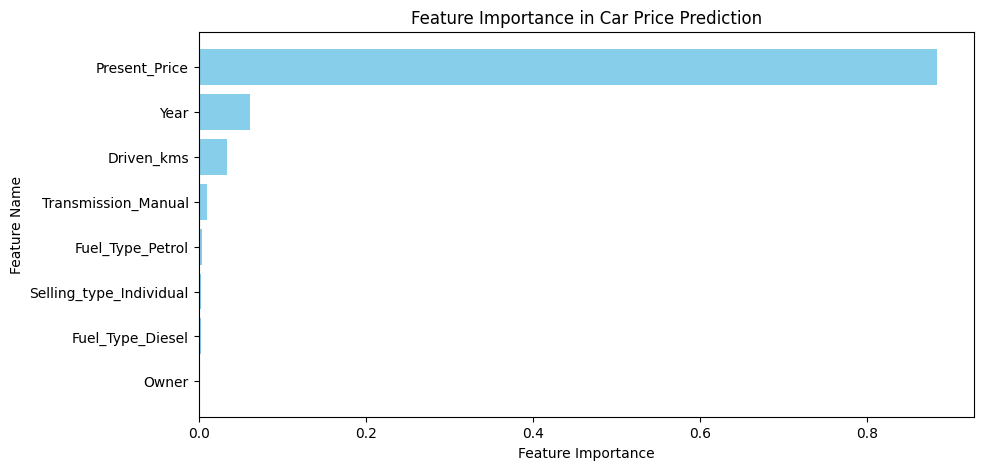

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_names = num_features + list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(cat_features))
importances = model.named_steps["regressor"].feature_importances_

# Sorting features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plotting feature importance
plt.figure(figsize=(10, 5))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Car Price Prediction")
plt.gca().invert_yaxis()
plt.show()


# New section